# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan?

1. Applicants having a credit history; 
2. Applicants with higher applicant and co-applicant incomes;
3. Applicants with higher education level;
4. Applicants who have properties in urban areas with high growth perspectives;

### Besides those, I would like to add a few more hypothesis to be tested:
5. Applicants who are from a mature age, such as from 40s on;
6. Applicants who hold a full-time job;
7. Applicants who requested a smaller amount of loan;
8. Applicants who requested a shorter loan term contract;
9. Applicants who are male.

Also, in case there is time, we can analyze if there is a relationship between the income of the group of applicants and the amount of loan asked to be borrowed.

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [707]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [708]:
# Loading the dataset into a df
df = pd.read_csv("customer_dataset.csv") 
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [709]:
# Let's check the shape first
df.shape

(614, 13)

In [710]:
# With the shape in mind, we can get the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From this description, we can see that there are missing values in some columns, with a higher number of them present in 'credit_history', 'self_employed', 'dependents', and 'loan_amount' fields. 

Look at some basic statistics for numerical variables.

In [711]:
# Converting the 'ApplicantIncome' to a float64 before getting the statistics
df['ApplicantIncome'] = df['ApplicantIncome'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [712]:
# Selecting the numeric columns from the df
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df_numeric = df[numeric_columns]
df_numeric.tail()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0
613,4583.0,0.0,133.0,360.0,0.0


In [713]:
# Getting the statistics of the numeric columns
df_statistics = df_numeric.describe()
df_statistics

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)

In [714]:
# Counting the number of applicants with a credit history of 1
credit_history_total_applicants = (df_numeric['Credit_History'] == 1).sum()
credit_history_total_applicants

475

2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?

In [715]:
# In order to answer this question, let's get the comparison of the values between those columns first
df_numeric_income = df_numeric[['ApplicantIncome', 'CoapplicantIncome']]
df_income_columns = df_numeric_income.describe()
df_income_columns


,ApplicantIncome,CoapplicantIncome
count,614.000000,614.000000
mean,5403.459283,1621.245798
std,6109.041673,2926.248369
min,150.000000,0.000000
25%,2877.500000,0.000000
50%,3812.500000,1188.500000
75%,5795.000000,2297.250000
max,81000.000000,41667.000000


From these results, it looks like that there is a significative difference between the income of the applicant and the co-applicant, such as:


- The average income of the applicant is much higher than that of the co-applicant. Specifically, the average income of the applicant is about 3.4 times higher than that of the co-applicant;
- The 'ApplicantIncome' column has a higher degree of variation than the 'CoapplicantIncome' column, as evidenced by the higher standard deviation;
- The minimum income in the 'ApplicantIncome' column is $150, while the minimum income in the 'CoapplicantIncome' column is zero. This suggests that some applicants do not have a co-applicant, or that their co-applicant has no income.

3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature?

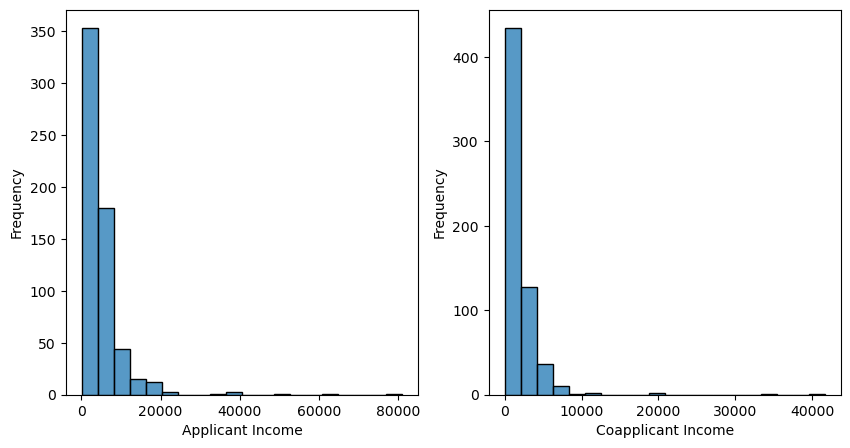

In [716]:
# Finally, let's visualize these 2 columns in a histogram
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plotting a histogram of ApplicantIncome in the first subplot
sns.histplot(ax=axs[0], data=df_numeric, x='ApplicantIncome', bins=20)
axs[0].set_xlabel('Applicant Income')
axs[0].set_ylabel('Frequency')

# Plotting a histogram of CoapplicantIncome in the second subplot
sns.histplot(ax=axs[1], data=df_numeric, x='CoapplicantIncome', bins=20)
axs[1].set_xlabel('Coapplicant Income')
axs[1].set_ylabel('Frequency')

# Displaying the plots
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


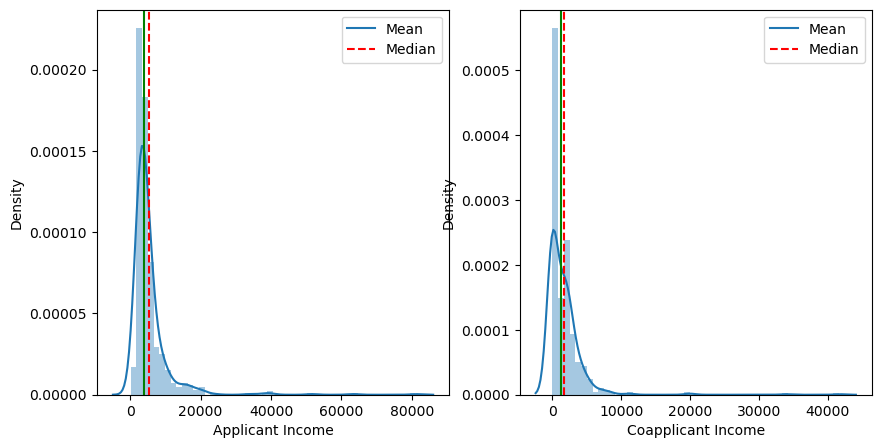

In [717]:
# And also in a distplot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plotting a density plot of ApplicantIncome in the first subplot
sns.distplot(ax=axs[0], a=df_numeric['ApplicantIncome'], kde=True)
axs[0].axvline(df_numeric['ApplicantIncome'].mean(), color='r', linestyle='--')
axs[0].axvline(df_numeric['ApplicantIncome'].median(), color='g', linestyle='-')
axs[0].set_xlabel('Applicant Income')
axs[0].set_ylabel('Density')
axs[0].legend({'Mean':df_numeric['ApplicantIncome'].mean(), 'Median':df_numeric['ApplicantIncome'].median()})

# Plotting a density plot of CoapplicantIncome in the second subplot
sns.distplot(ax=axs[1], a=df_numeric['CoapplicantIncome'], kde=True)
axs[1].axvline(df_numeric['CoapplicantIncome'].mean(), color='r', linestyle='--')
axs[1].axvline(df_numeric['CoapplicantIncome'].median(), color='g', linestyle='-')
axs[1].set_xlabel('Coapplicant Income')
axs[1].set_ylabel('Density')
axs[1].legend({'Mean':df_numeric['CoapplicantIncome'].mean(), 'Median':df_numeric['CoapplicantIncome'].median()})

# Displaying the plots
plt.show()

From the provided plots, it can be observed that both the ApplicantIncome and CoapplicantIncome columns are not normally distributed and have a positive skewness, which means they are concentrated towards the lower end of the income scale and have a long right tail. Additionally, ApplicantIncome have a higher kurtosis (taller peak) which indicates a heavy tail on both sides.

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [718]:
# In order to answer this question, let's get the categorical columns from the df first
df_categorical_columns = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']]
df_categorical = df_categorical_columns
df_categorical.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [719]:
# Getting the number of unique values in each categorical column from the df_categorical
def unique_value(df):
    df_categorical = df.select_dtypes(include=['object'])
    for column in df_categorical.columns:
        print(column, ':', df_categorical[column].nunique())

In [720]:
# Calling up the function
unique_value(df_categorical)

Gender : 2
Married : 2
Dependents : 4
Education : 2
Self_Employed : 2
Property_Area : 3
Loan_Status : 2


It is clear that most of the columns represent a binary information, such as gender (F and M), married (Y or N), self-employed (Y or N) and loan status approval (Y or N). This structure of the information is going to help us in the feature enginnering part.

Explore further using the frequency of different categories in each nominal variable. Exclude the ID for obvious reasons.

In [721]:
# Creating a function to get the frequency of the categories in each nominal field
def get_category_frequency(df):
    # Selecting the categorical columns
    df_categorical = df.select_dtypes(include=['object'])
    # Looping through each categorical column and printing the category frequency
    for column in df_categorical.columns:
        print('\n', column, ':')
        print(df[column].value_counts())

In [722]:
# Calling up the function
get_category_frequency(df_categorical)


 Gender :
Male      489
Female    112
Name: Gender, dtype: int64

 Married :
Yes    398
No     213
Name: Married, dtype: int64

 Dependents :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

 Education :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

 Self_Employed :
No     500
Yes     82
Name: Self_Employed, dtype: int64

 Property_Area :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

 Loan_Status :
Y    422
N    192
Name: Loan_Status, dtype: int64


From these results, we could extract the basic demographics from our customers of this dataset. Also, we could see that the dataset is biased towards genre (male), civil status (married) and education (graduate) as there is a larger count of these values in comparison with the others. It is also important to check the amount of loan status approval which is significative bigger than the number of decline.

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



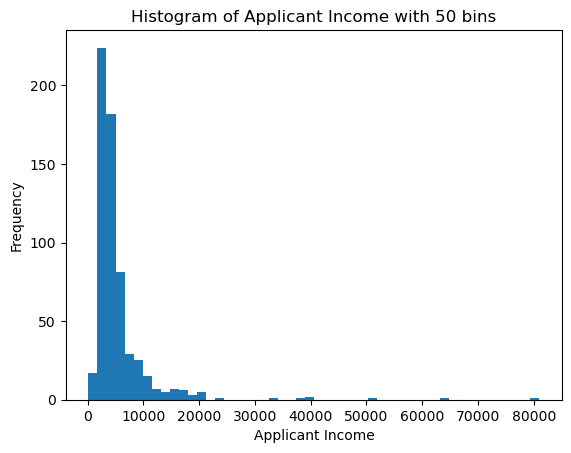

In [723]:
# Plotting the histogram of ApplicantIncome with 50 bins
plt.hist(df_numeric['ApplicantIncome'], bins=50)
plt.title('Histogram of Applicant Income with 50 bins')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

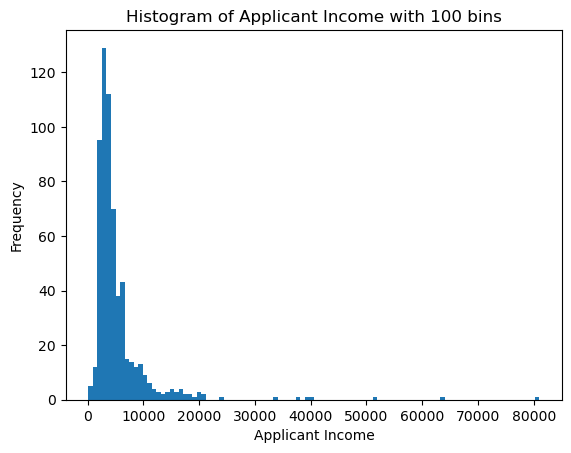

In [724]:
# Plotting the histogram of ApplicantIncome with 100 bins
plt.hist(df_numeric['ApplicantIncome'], bins=100)
plt.title('Histogram of Applicant Income with 100 bins')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

From these 2 histograms, it is noted the presence of some outliers on the right tail of the distribution as this represent fewer applicants with a high income.

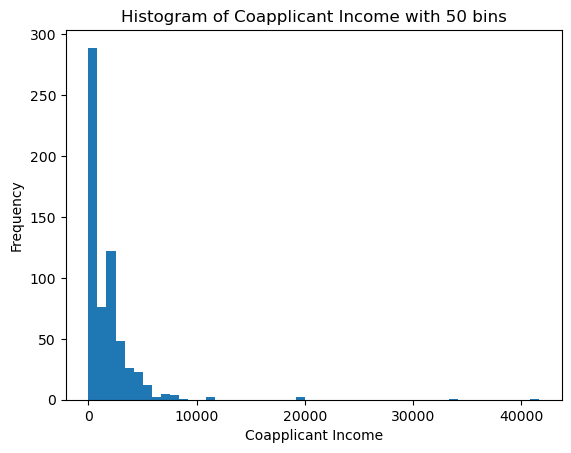

In [726]:
# Plotting the histogram of CoapplicantIncome with 50 bins
plt.hist(df_numeric['CoapplicantIncome'], bins=50)
plt.title('Histogram of Coapplicant Income with 50 bins')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.show()

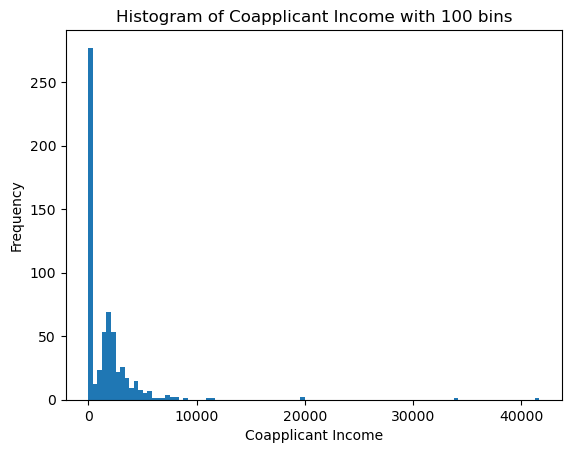

In [727]:
# Plotting the histogram of CoapplicantIncome with 100 bins
plt.hist(df_numeric['CoapplicantIncome'], bins=100)
plt.title('Histogram of Coapplicant Income with 100 bins')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.show()

In regards of the histogram of the co-applicants, we can see that most of them are concentrated between 0 and their mean. Also, there are fewer outliers present.


Look at box plots to understand the distributions. 

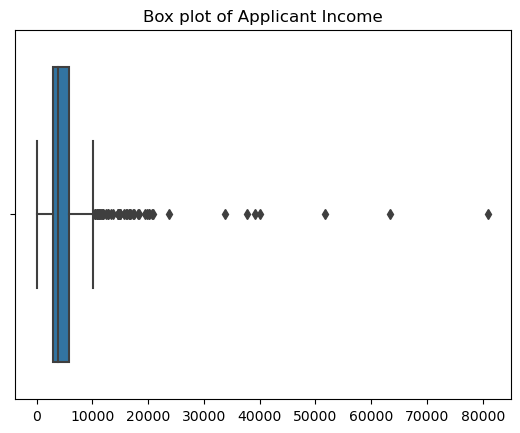

In [728]:
# Box plot of ApplicantIncome
sns.boxplot(x=df_numeric["ApplicantIncome"])
plt.title("Box plot of Applicant Income")
plt.xlabel(None)
plt.show()

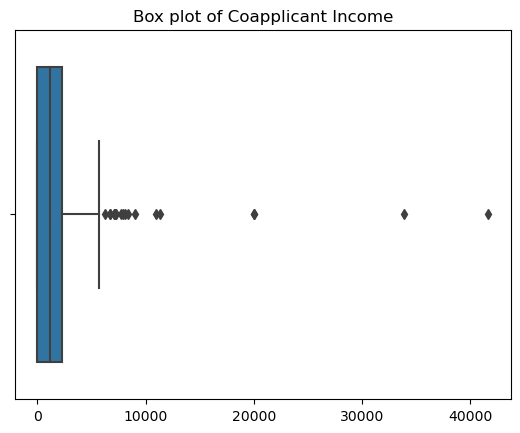

In [729]:
# Box plot of CoapplicantIncome
sns.boxplot(x=df_numeric["CoapplicantIncome"])
plt.title("Box plot of Coapplicant Income")
plt.xlabel(None)
plt.show()

The box plots indicate that the income distribution of co-applicants is flatter with fewer outliers compared to the income distribution of applicants, especially because the income range for co-applicants is relatively narrow compared to that of applicants. Also, the income of the applicants have a higher variation and maximum values as shown by the whiskers and dots.

Look at the distribution of income segregated  by `Education`

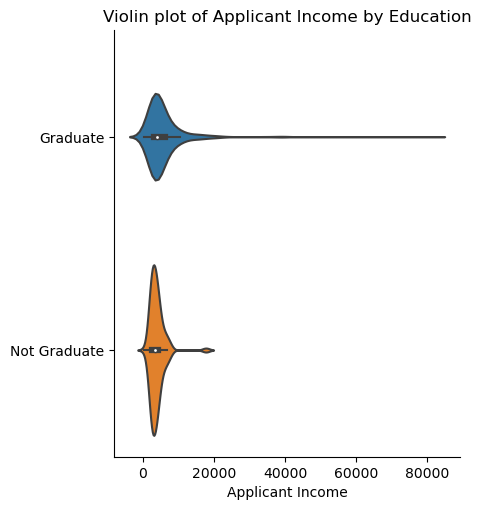

In [730]:
# Creating a violin plot of the ApplicantIncome segregated by Education
sns.catplot(x="ApplicantIncome", y="Education", data=df, kind="violin")
plt.title("Violin plot of Applicant Income by Education")
plt.xlabel("Applicant Income")
plt.ylabel(None)
plt.show()

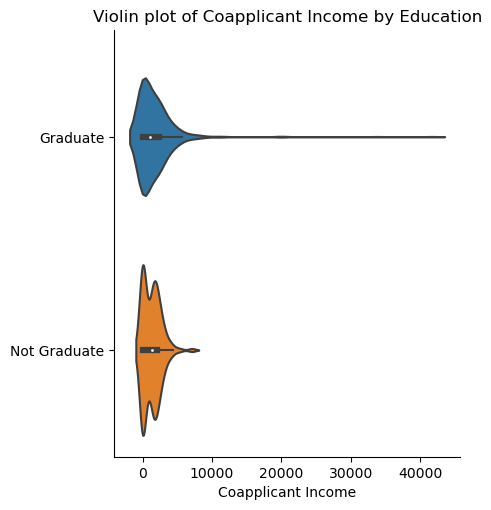

In [731]:
# Creating a violin plot of the CoapplicantIncome segregated by Education
sns.catplot(x="CoapplicantIncome", y="Education", data=df, kind="violin")
plt.title("Violin plot of Coapplicant Income by Education")
plt.xlabel("Coapplicant Income")
plt.ylabel(None)
plt.show()

Look at the histogram and box plot of 'LoanAmount'.

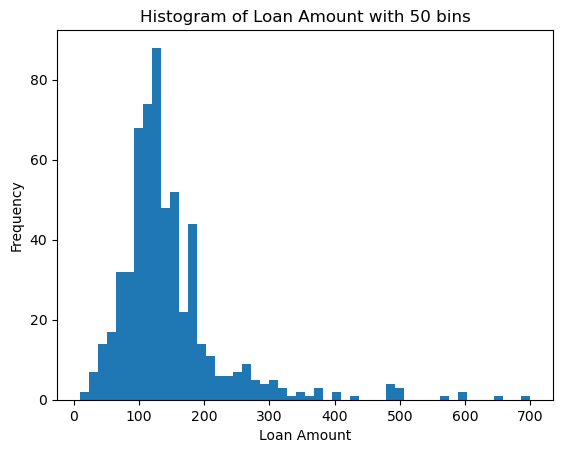

In [737]:
# Plotting the histogram of Loan Amount with 50 bins
plt.hist(df_numeric['LoanAmount'], bins=50)
plt.title('Histogram of Loan Amount with 50 bins')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

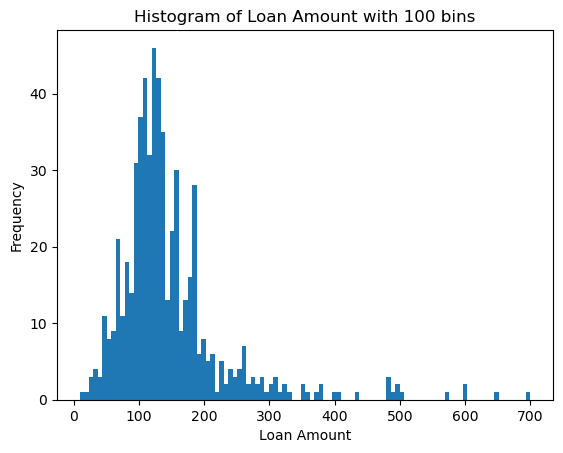

In [738]:
# Plotting the histogram of Loan Amount with 100 bins
plt.hist(df_numeric['LoanAmount'], bins=100)
plt.title('Histogram of Loan Amount with 100 bins')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

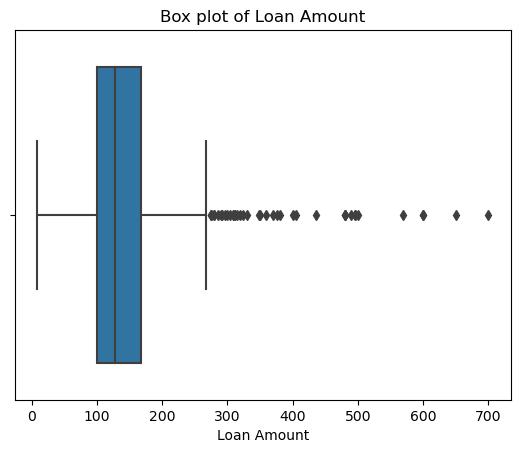

In [739]:
# Box plot of Loan Amount
sns.boxplot(x=df_numeric["LoanAmount"])
plt.title("Box plot of Loan Amount")
plt.xlabel("Loan Amount")
plt.show()

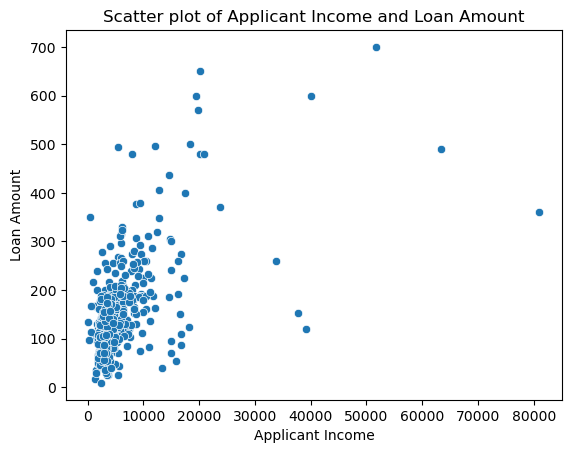

In [740]:
# Creating a scatter plot to see if there is any relationship between applicant income and loan amount
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data=df_numeric)
plt.title("Scatter plot of Applicant Income and Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

It seems from this scatter plot that there is no specific correlation between the income of the applicant and the loan of amount requested; so with more research we might reject one of our hypothesis about a relationship between income of the applicants and the loan amount requested.

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [741]:
# First, let's read our df into 2 parts
df_categorical.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
5,Male,Yes,2,Graduate,Yes,Urban,Y
6,Male,Yes,0,Not Graduate,No,Urban,Y
7,Male,Yes,3+,Graduate,No,Semiurban,N
8,Male,Yes,2,Graduate,No,Urban,Y
9,Male,Yes,1,Graduate,No,Semiurban,N


In [742]:
df_numeric.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
5,5417.0,4196.0,267.0,360.0,1.0
6,2333.0,1516.0,95.0,360.0,1.0
7,3036.0,2504.0,158.0,360.0,0.0
8,4006.0,1526.0,168.0,360.0,1.0
9,12841.0,10968.0,349.0,360.0,1.0


In order to understand the percentage of each category in comparison with the loan amount and/or loan status approval variables, we need to define a percentage function first and then apply it to create a pivot table to summarize each of the data.

In [743]:
# Define a custom aggregation function to calculate the percentage of some categories in our df
def percentage(x):
    return np.round(100 * x / float(x.sum()), 2)

In [744]:
# The pivot table 1 is aggregated by the Loan Amount
pivot_table_1 = pd.pivot_table(df, 
                               values='LoanAmount', 
                               index=['Gender', 'Self_Employed'], 
                               columns=['Education'], 
                               aggfunc='count')

# Apply the percentage function to each column of the pivot table
pivot_table_1 = pivot_table_1.apply(percentage, axis=0)
pivot_table_1

Education             Graduate  Not Graduate
Gender Self_Employed                        
Female No                17.29         10.83
       Yes                2.34          3.33
Male   No                69.16         75.00
       Yes               11.21         10.83

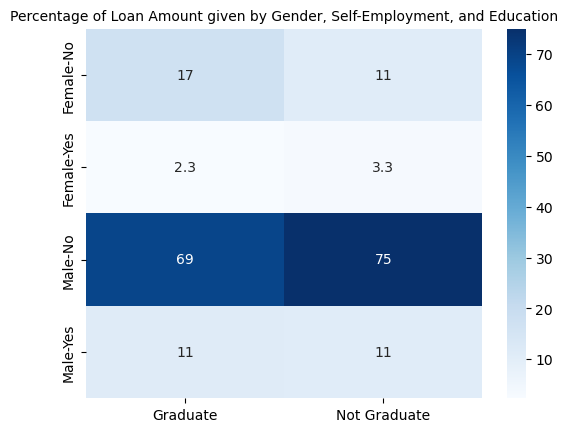

In [745]:
# Finally, let's create a heatmap to visualize the pivot table 1
sns.heatmap(pivot_table_1, annot=True, cmap='Blues')
plt.title('Percentage of Loan Amount given by Gender, Self-Employment, and Education', fontsize=10)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

From the pivot table 1, we can analyze partially the hypothesis about the applicants and co-applicants who got most of the percentage of the loan were male, not graduated and not self-employed. However, it is important to note that the dataset is not normally distributted and has more count of males, so we need to keep in mind the bias towards our dataset when analysing this and other hypotheses.

In [746]:
# Pivot table aggregated by percentage of Loan Status (of approved loan)
pivot_table_2 = pd.pivot_table(df, 
                               values='Loan_Status', 
                               index=['Gender', 'Married'], 
                               columns=['Education'], 
                               aggfunc='count')

# Applying the percentage function to each column of the pivot table
pivot_table_2 = pivot_table_2.apply(percentage, axis=0)
pivot_table_2


Education       Graduate  Not Graduate
Gender Married                        
Female No          14.19         10.53
       Yes          5.38          4.51
Male   No          21.29         23.31
       Yes         59.14         61.65

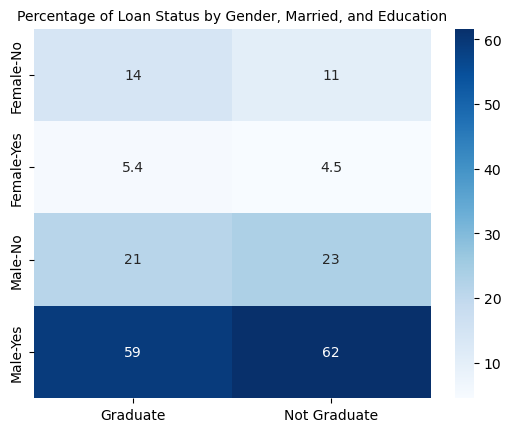

In [747]:
# Then, let's create a heatmap to visualize the pivot table 2
sns.heatmap(pivot_table_2, annot=True, cmap='Blues')
plt.title('Percentage of Loan Status by Gender, Married, and Education', fontsize=10)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

From this pivot table 2, it is noted that in regards of the count of the loan approved, the group of male, married (probably with a co-applicant) and not graduated constitute the group of applicants who mostly likely are approved to get the loan. 

In [748]:
# The pivot table 3 is agreggated also by the percentage of the Loan Status, but now we added the property area type variable
pivot_table_3 = pd.pivot_table(df, 
                               values='Loan_Status', 
                               index=['Gender', 'Married'], 
                               columns=['Property_Area'], 
                               aggfunc='count')

# Applying the percentage function to each column of the pivot table
pivot_table_2 = pivot_table_2.apply(percentage, axis=0)
pivot_table_3 = pd.pivot_table(df, values='Loan_Status', index=['Gender', 'Married'], columns=['Property_Area'], aggfunc='count')
pivot_table_3

Property_Area   Rural  Semiurban  Urban
Gender Married                         
Female No          19         34     27
       Yes          5         20      6
Male   No          44         44     42
       Yes        107        127    123

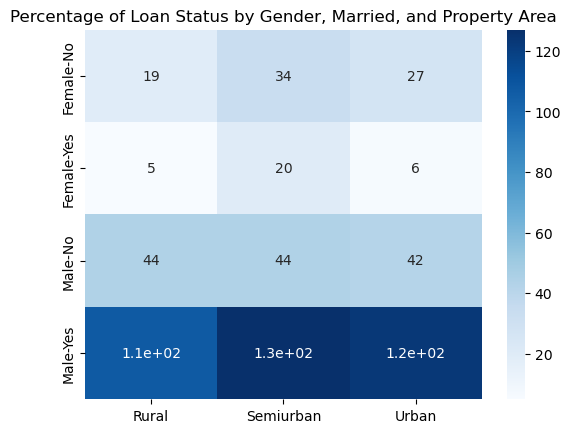

In [749]:
# Then, let's create a heatmap to visualize the pivot table 3
sns.heatmap(pivot_table_3, annot=True, cmap='Blues')
plt.title('Percentage of Loan Status by Gender, Married, and Property Area')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

Finally, with the pivot table 3, we could check that by living in a semiurban area the applicant/co-applicant is more likely to be approved to receive a loan. Therefore, the property area might be another factor that influences the loan approval.

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [750]:
# Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [751]:
# Counting the number of missing values in each column
missing_values = df.isnull().sum()
missing_values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [574]:
# Calculating the percentage of missing values in each column
percentage_of_missing_values = (missing_values / len(df)) * 100
percentage_of_missing_values

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [752]:
# Merging the results in a new df to evaluate the whole dataset together
df_missing_values_analyzed = pd.concat([missing_values, percentage_of_missing_values], axis=1, keys=['Total_Missing_Values', 'Percentage'])
df_missing_values_analyzed

,Total_Missing_Values,Percentage
Loan_ID,0,0.000000
Gender,13,2.117264
Married,3,0.488599
Dependents,15,2.442997
Education,0,0.000000
Self_Employed,32,5.211726
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
LoanAmount,22,3.583062
Loan_Amount_Term,14,2.280130


We are going to handle the missing values from the most to the least field that present the higher percentage of total of rows affected by them. Therefore, we are going to start off with the 'credit_history' and finish this step with the 'married' field.

In [753]:
# Filling the missing values in the 'Credit_History' column with 0
# Also, since the column can only take on the values 0 or 1, filling the missing values with 0 would represent a 'no' response, indicating that the applicant/co-applicant has no credit history
df['Credit_History'] = df['Credit_History'].fillna(0)

In [754]:
# Filling the missing values of the 'Self_Employed' field with the string 'No'
df['Self_Employed'] = df['Self_Employed'].fillna('No')

In [755]:
# Filling the missing values of the 'LoanAmount' by the mean of the column
df['LoanAmount'] = df['LoanAmount'].fillna((df['LoanAmount'].mean()))

In [756]:
# Filling the missing values of the 'Dependents' column with 0 (meaning the inexistence of dependents declared)
df['Dependents'] = df['Dependents'].fillna(0)

In [757]:
# Filling the missing values of the 'Loan_Amount_Term' column with the mode first (by the most common type of term agreement)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna((df['Loan_Amount_Term'].mode()))
# And with the mean on the rows that couldn't be filled out with this imputation method
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna((df['Loan_Amount_Term'].mean()))

In [758]:
# Filling the missing values of the 'Married' column with 'No'
df['Married'] = df['Married'].fillna('No')

In [759]:
# Droping rows with missing values in the 'Gender' column
df = df.dropna(subset=['Gender'])

In [760]:
# Checking for missing values again
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [761]:
# First, let's get the statistics of this column to compare the results after the log transformation.
df['LoanAmount'].describe()

count    601.000000
mean     145.068332
std       81.037698
min        9.000000
25%      100.000000
50%      128.000000
75%      162.000000
max      650.000000
Name: LoanAmount, dtype: float64

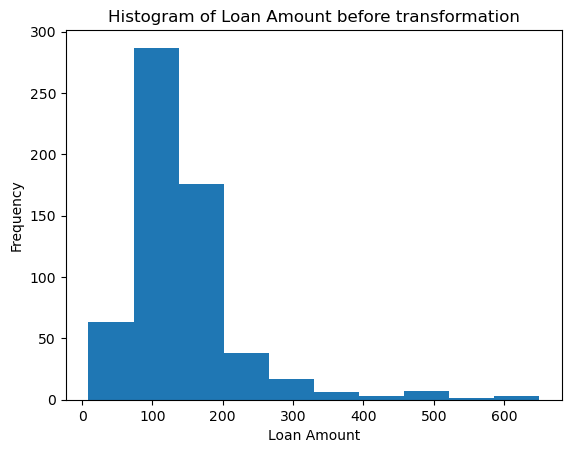

In [762]:
# Plotting the histogram of the 'LoanAmount' column before transformation
plt.hist(df['LoanAmount'].dropna())
plt.title('Histogram of Loan Amount before transformation')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

In [763]:
# Applying the log transformation to the 'LoanAmount' column
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'] 

0      4.986426
1      4.852030
2      4.189655
3      4.787492
4      4.948760
         ...   
609    4.262680
610    3.688879
611    5.533389
612    5.231109
613    4.890349
Name: LoanAmount_log, Length: 601, dtype: float64

In [764]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,4.986426
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,4.948760


In [765]:
# Getting the statistics of the column after the log technique
df['LoanAmount_log'].describe() 

count    601.000000
mean       4.855862
std        0.493286
min        2.197225
25%        4.605170
50%        4.852030
75%        5.087596
max        6.476972
Name: LoanAmount_log, dtype: float64

From the statistics done before and after the log aplication, we can see that the standard deviation (std) was significative reduced as well as the values of the IQR. This happened because the log has the effect of reducing the spread of the data and then it made it more compact. As the standard deviation is sensitive to extreme values, and is based on the squared deviations from the mean, by applying a log transformation, we are compressing the range of values that the variable can take on, which can help to reduce the impact of extreme values and make the spread of the data more manageable.

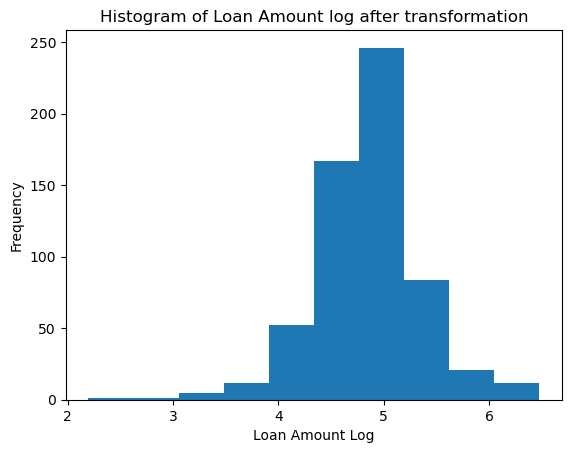

In [766]:
# Plotting the histogram of the 'LoanAmount_log' column after transformation
plt.hist(df['LoanAmount_log'].dropna())
plt.title('Histogram of Loan Amount log after transformation')
plt.xlabel('Loan Amount Log')
plt.ylabel('Frequency')
plt.show()

As we can see, after the log transformation to the column 'Loan_Amount', this variable appeared to have a distribution more symetric and therefore closer to the normal one. This is why the log transformation can help us in reducing the impact of extreme values on our analysis.

Combine both incomes as total income and take a log transformation of the same.

In [768]:
# Combining the applicant and co-applicant income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Total_Income']

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: Total_Income, Length: 601, dtype: float64

In [769]:
# Calculating the statistics 
df['Total_Income'].describe()

count      601.000000
mean      6921.429151
std       6208.004250
min       1442.000000
25%       4160.000000
50%       5416.000000
75%       7453.000000
max      81000.000000
Name: Total_Income, dtype: float64

In [770]:
# Applying the log transformation
df['Total_Income'] = np.log(df['Total_Income'])
df['Total_Income']

0      8.674026
1      8.714568
2      8.006368
3      8.505323
4      8.699515
         ...   
609    7.972466
610    8.320205
611    9.025456
612    8.933664
613    8.430109
Name: Total_Income, Length: 601, dtype: float64

In [771]:
# Calculating the statistics after the log transformation
df['Total_Income'].describe()

count    601.000000
mean       8.661903
std        0.537129
min        7.273786
25%        8.333270
50%        8.597113
75%        8.916372
max       11.302204
Name: Total_Income, dtype: float64

After the log transformation, the 'Total_Income' is clearly with a lower std and IQR which is making the data more compactble and closer to a symetric distribution (the mean and the 50% value of the IQR are almost the same now).

In [772]:
# Checking the head of the dataset before moving forward in the feature enginnering process
df_modified = df.reset_index(drop=True)
df_modified.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,8.699515


In order to build a machine learning model, it is important to preprocess the categorical variables by transforming them into numerical data types.

In [773]:
# Creating a function to map binary columns to 1 and 0

def binary_to_numeric(df, columns):
    """
    Converts binary columns in a pandas DataFrame to numeric values of 0 and 1.
    
    Args:
        df (pandas.DataFrame): The DataFrame containing the binary columns.
        columns (list of str): A list of column names to convert.
        
    Returns:
        pandas.DataFrame: The modified DataFrame with binary columns replaced by numeric values.
    """
    # Loop over the specified columns and replace each value with 0 or 1
    for col in columns:
        df[col] = df[col].map({'No': 0, 'Yes': 1})
        
    return df

In [774]:
# Creating a function to encode some of our columns

def one_hot_encode(df, columns):
    """
    Converts columns in a pandas DataFrame to a binary value of 0 or 1.
    
    Args:
        df (pandas.DataFrame): The DataFrame containing the columns to be converted.
        columns (list of str): A list of column names to convert.
        
    Returns:
        pandas.DataFrame: The modified DataFrame with one-hot encoded columns replaced by numeric values.
    """
    # Loop over the columns designated to be one-hot encoded
    for col in columns:
        dummies = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, dummies], axis=1)
        df.drop(col, axis=1, inplace=True)
    
    return df

In [775]:
# Converting the column 'Married'
df_modified['Married'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [776]:
# Converting the column 'Self_Employed'
df_modified['Self_Employed'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [777]:
# Converting the column 'Loan_Status'
df_modified['Loan_Status'].replace({'Y': 1, 'N': 0}, inplace=True)

In [778]:
# Converting the column 'Gender'
df_modified['Gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

In [779]:
# Converting the column 'Education', 
df_modified['Education'].replace({'Graduate': 1, 'Not Graduate': 0}, inplace=True)

In [780]:
# Converting the column 'Property_Area'
df_modified['Property_Area'].replace({'Urban': 0, 'Semiurban': 1, 'Rural': 2}, inplace=True)

In [781]:
# Finally, let's replace the value 3+ under dependents to 3 to make this column numerical
df_modified['Dependents'] = df_modified['Dependents'].replace({'3+': 3})
df_modified['Dependents'] = df_modified['Dependents'].astype(int)

In [782]:
df_modified.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income
0,LP001002,0,0,0,1,0,5849.0,0.0,146.412162,360.0,1.0,0,1,4.986426,8.674026
1,LP001003,0,1,1,1,0,4583.0,1508.0,128.000000,360.0,1.0,2,0,4.852030,8.714568
2,LP001005,0,1,0,1,1,3000.0,0.0,66.000000,360.0,1.0,0,1,4.189655,8.006368
3,LP001006,0,1,0,0,0,2583.0,2358.0,120.000000,360.0,1.0,0,1,4.787492,8.505323
4,LP001008,0,0,0,1,0,6000.0,0.0,141.000000,360.0,1.0,0,1,4.948760,8.699515
5,LP001011,0,1,2,1,1,5417.0,4196.0,267.000000,360.0,1.0,0,1,5.587249,9.170872
6,LP001013,0,1,0,0,0,2333.0,1516.0,95.000000,360.0,1.0,0,1,4.553877,8.255569
7,LP001014,0,1,3,1,0,3036.0,2504.0,158.000000,360.0,0.0,1,0,5.062595,8.619750
8,LP001018,0,1,2,1,0,4006.0,1526.0,168.000000,360.0,1.0,0,1,5.123964,8.618305
9,LP001020,0,1,1,1,0,12841.0,10968.0,349.000000,360.0,1.0,1,0,5.855072,10.077819


In [783]:
# Checking the final shape of the df
df_modified.shape

(601, 15)

In [784]:
# And the missing values
df_modified.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
Total_Income         0
dtype: int64

In [785]:
# And data types
df_modified.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
Total_Income         float64
dtype: object

In [786]:
# Creating a new log of the column 'Loan_Amount_Term'
df_modified['Loan_Amount_Term_Log'] = np.log(df_modified['Loan_Amount_Term'])
df_modified['Loan_Amount_Term_Log']

0      5.886104
1      5.886104
2      5.886104
3      5.886104
4      5.886104
         ...   
596    5.886104
597    5.192957
598    5.886104
599    5.886104
600    5.886104
Name: Loan_Amount_Term_Log, Length: 601, dtype: float64

In [787]:
# Making the change final to the df
df_modified = df_modified.reset_index(drop=True)
df_modified.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Loan_Amount_Term_Log
0,LP001002,0,0,0,1,0,5849.0,0.0,146.412162,360.0,1.0,0,1,4.986426,8.674026,5.886104
1,LP001003,0,1,1,1,0,4583.0,1508.0,128.000000,360.0,1.0,2,0,4.852030,8.714568,5.886104
2,LP001005,0,1,0,1,1,3000.0,0.0,66.000000,360.0,1.0,0,1,4.189655,8.006368,5.886104
3,LP001006,0,1,0,0,0,2583.0,2358.0,120.000000,360.0,1.0,0,1,4.787492,8.505323,5.886104
4,LP001008,0,0,0,1,0,6000.0,0.0,141.000000,360.0,1.0,0,1,4.948760,8.699515,5.886104


In [788]:
# Dropping some columns that were transformed with the log
df_final = df_modified.drop(['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term'], axis=1)

In [789]:
# Saving the cleaned and preprocessed df to a .csv file
df_final.to_csv("df_customer_of_loan.csv", index=False)

## 4. Building a Predictive Model

In [814]:
# Importing the libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import FeatureUnion

In [791]:
# Separating the dataframe between the X (independent) and y (dependent) variables
X = df_final.drop('Loan_Status', axis=1).select_dtypes(include=[np.number])
y = df_final['Loan_Status']

In [792]:
# Splitting the set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=100)

In [793]:
# Printing the X_train 
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,Total_Income,Loan_Amount_Term_Log
260,0,0,0,1,1,1.0,1,4.852030,8.549854,5.886104
222,0,1,0,0,1,1.0,0,4.927254,8.462737,5.886104
433,1,1,0,0,1,1.0,2,4.927254,8.873748,5.886104
189,0,0,0,1,0,1.0,1,4.330733,8.257904,5.886104
157,0,1,0,1,0,1.0,1,5.541264,9.230927,5.886104


In [794]:
# Printing the y_train
y_train.head()

260    1
222    0
433    1
189    1
157    1
Name: Loan_Status, dtype: int64

As the loan prediction can be represented by a binary classification, we are going to use the Logistic Regression Model as our baseline model first. The Logistic regression is a commonly used binary classification algorithm that can be used to predict whether a customer will default on their loan or not. It is a simple and interpretable algorithm that can work well with a large number of features.

In [797]:
# Applying the .fit() and .predict() methods to our baseline_model_1
baseline_model_1 = LogisticRegression(max_iter=1000, random_state=100) # Creating an instance of the LogisticRegression model
baseline_model_1.fit(X_train, y_train) # Fitting the model to the training data
y_pred_1 = baseline_model_1.predict(X_test) # Predicting the target variable for the test data

# Evaluating the model performance
accuracy_1 = accuracy_score(y_test, y_pred_1)
precision_1 = precision_score(y_test, y_pred_1)
recall_1 = recall_score(y_test, y_pred_1)
f1_1 = f1_score(y_test, y_pred_1)
roc_auc_1 = roc_auc_score(y_test, y_pred_1)
confusion_mat_1 = confusion_matrix(y_test, y_pred_1)

# Printing the evaluation metrics
print("Accuracy: ", accuracy_1)
print("Precision: ", precision_1)
print("Recall: ", recall_1)
print("F1-score: ", f1_1)
print("ROC-AUC score: ", roc_auc_1)
print("Confusion Matrix:\n", confusion_mat_1)

Accuracy:  0.7218543046357616
Precision:  0.7043478260869566
Recall:  0.9101123595505618
F1-score:  0.7941176470588236
ROC-AUC score:  0.6808626313881841
Confusion Matrix:
 [[28 34]
 [ 8 81]]


In [798]:
# Applying the .fit() and .predict() methods to our baseline_model_2
baseline_model_2 = RandomForestClassifier(n_estimators=1000, random_state=100) # Creating an instance of the Random Forest model
baseline_model_2.fit(X_train, y_train) # Fitting the model to the training data
y_pred_2 = baseline_model_2.predict(X_test) # Predicting the target variable for the test data

# Evaluating the model performance
accuracy_2 = accuracy_score(y_test, y_pred_2)
precision_2 = precision_score(y_test, y_pred_2)
recall_2 = recall_score(y_test, y_pred_2)
f1_2 = f1_score(y_test, y_pred_2)
roc_auc_2 = roc_auc_score(y_test, y_pred_2)
confusion_mat_2 = confusion_matrix(y_test, y_pred_2)

# Printing the evaluation metrics
print("Accuracy: ", accuracy_2)
print("Precision: ", precision_2)
print("Recall: ", recall_2)
print("F1-score: ", f1_2)
print("ROC-AUC score: ", roc_auc_2)
print("Confusion Matrix:\n", confusion_mat_2)

Accuracy:  0.6754966887417219
Precision:  0.6694915254237288
Recall:  0.8876404494382022
F1-score:  0.7632850241545893
ROC-AUC score:  0.629304095686843
Confusion Matrix:
 [[23 39]
 [10 79]]


Try paramater grid search to improve the results for both baseline models.

In [799]:
# Trying the parameter grid search for the baseline_model_1 (Logistic Regression model)
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [800]:
# Initializing the Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=100)

# Creating a GridSearchCV object and fitting it to the training data
grid_search_1 = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5)
grid_search_1.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, random_state=100),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [802]:
# Printting the best parameters and best score
print("Best parameters: ", grid_search_1.best_params_)
print("Best score: ", grid_search_1.best_score_)

# Predictting the labels of the testing data using the best estimator
y_pred_lr = grid_search_1.best_estimator_.predict(X_test)

# Evaluating the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
print("Accuracy: ", accuracy_lr)
print("Precision: ", precision_lr)
print("Recall: ", recall_lr)
print("F1-score: ", f1_lr)

Best parameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score:  0.7844444444444445
Accuracy:  0.7284768211920529
Precision:  0.7105263157894737
Recall:  0.9101123595505618
F1-score:  0.7980295566502463


In [803]:
# Trying the parameter grid search for the baseline_model_2 (Random Forest Classifier model)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [804]:
# Initializing the Random Forest Classifier model
rf = RandomForestClassifier(n_estimators=1000, random_state=100)

# Creating a GridSearchCV object and fitting it to the training data
grid_search_2 = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5)
grid_search_2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=1000,
                                              random_state=100),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [805]:
# Printting the best parameters and best score
print("Best parameters: ", grid_search_2.best_params_)
print("Best score: ", grid_search_2.best_score_)

# Predictting the labels of the testing data using the best estimator
y_pred_rf = grid_search_2.best_estimator_.predict(X_test)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print("Accuracy: ", accuracy_rf)
print("Precision: ", precision_rf)
print("Recall: ", recall_rf)
print("F1-score: ", f1_rf)

Best parameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  0.7733333333333334
Accuracy:  0.7284768211920529
Precision:  0.7033898305084746
Recall:  0.9325842696629213
F1-score:  0.8019323671497584


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [806]:
# Checking the end of our dataset
df_final.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Loan_Amount_Term_Log
591,LP002959,1,1,1,1,0,1.0,1,1,6.206576,9.392662,5.886104
592,LP002960,0,1,0,0,0,1.0,0,0,4.986426,8.732305,5.192957
593,LP002961,0,1,1,1,0,1.0,1,1,5.153292,8.682708,5.886104
594,LP002964,0,1,2,0,0,1.0,2,1,5.056246,8.593784,5.886104
595,LP002974,0,1,0,1,0,1.0,2,1,4.682131,8.552946,5.886104
596,LP002978,1,0,0,1,0,1.0,2,1,4.262680,7.972466,5.886104
597,LP002979,0,1,3,1,0,1.0,2,1,3.688879,8.320205,5.192957
598,LP002983,0,1,1,1,0,1.0,0,1,5.533389,9.025456,5.886104
599,LP002984,0,1,2,1,0,1.0,0,1,5.231109,8.933664,5.886104
600,LP002990,1,0,0,1,1,0.0,1,0,4.890349,8.430109,5.886104


In [807]:
# Checking our independent variables (x)
X_train.tail(10)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,Total_Income,Loan_Amount_Term_Log
570,0,0,0,1,0,1.0,0,4.499810,10.482149,5.886104
316,0,1,3,1,0,1.0,1,4.820282,8.418698,5.886104
228,0,0,0,0,0,1.0,2,4.787492,8.663369,5.834811
280,0,1,0,1,0,1.0,2,4.986426,9.936294,5.886104
526,0,1,0,1,0,1.0,0,5.780744,9.214233,5.886104
578,0,1,0,1,0,1.0,1,4.025352,8.766550,5.192957
53,1,1,1,1,1,0.0,0,5.655992,9.350102,5.886104
350,0,1,2,1,0,1.0,2,5.105945,9.350102,5.886104
79,1,0,0,1,0,1.0,1,4.709530,8.254789,5.886104
520,0,1,0,1,0,0.0,2,5.375278,8.783396,5.886104


In [808]:
# Checking our dependent variable (loan status approval, yes = 1 and no = 0)
y_train.tail(10)

570    0
316    1
228    1
280    0
526    1
578    1
53     0
350    1
79     1
520    1
Name: Loan_Status, dtype: int64

In [809]:
# Importing libraries
from sklearn.pipeline import Pipeline, FeatureUnion

In [811]:
# Creating the pipeline of the Logistic Regression. These are the steps: (1) Scaling, (2) PCA and (3) Logistic Regressor
pipeline_model_1 = Pipeline(steps=[('scaling', StandardScaler()),
                           ('pca', PCA(n_components=5)),
                           ('classifier', LogisticRegression())])
pipeline_model_1.fit(X_train, y_train) # Fitting my pipeline with my trainning data 
y_pred_model_1 = pipeline_model_1.predict(X_test) # Creating my variable y_pred

# Evaluating my model
accuracy_model_1 = accuracy_score(y_test, y_pred_model_1)
precision_model_1 = precision_score(y_test, y_pred_model_1)
recall_model_1 = recall_score(y_test, y_pred_model_1)
f1_model_1 = f1_score(y_test, y_pred_model_1)
print("Accuracy: ", accuracy_model_1)
print("Precision: ", precision_model_1)
print("Recall: ", recall_model_1)
print("F1-score: ", f1_model_1)

Accuracy:  0.7086092715231788
Precision:  0.6890756302521008
Recall:  0.9213483146067416
F1-score:  0.7884615384615384


In [813]:
# Creating the pipeline of Random Forest Classifier. These are the steps: (1) Scaling, (2) PCA and (3) Random Forest Classifier
pipeline_model_2 = Pipeline(steps=[('scaling', StandardScaler()),
                           ('pca', PCA(n_components=5)),
                           ('classifier', RandomForestClassifier())])
pipeline_model_2.fit(X_train, y_train) # Fitting my pipeline with my trainning data 
y_pred_model_2 = pipeline_model_2.predict(X_test) # Creating my variable y_pred

# Evaluating my model
accuracy_model_2 = accuracy_score(y_test, y_pred_model_2)
precision_model_2 = precision_score(y_test, y_pred_model_2)
recall_model_2 = recall_score(y_test, y_pred_model_2)
f1_model_2 = f1_score(y_test, y_pred_model_2)
print("Accuracy: ", accuracy_model_2)
print("Precision: ", precision_model_2)
print("Recall: ", recall_model_2)
print("F1-score: ", f1_model_2)

Accuracy:  0.6423841059602649
Precision:  0.6446280991735537
Recall:  0.8764044943820225
F1-score:  0.7428571428571428


As our pipeline hasn't given to us better results than our base line model with the hyperparameter tunning, we are going to use a method called .FeatureUnion, apply the GridSearchCV and combine different models.

In [826]:
# Combining different models
feature_union = FeatureUnion([('pca', PCA(n_components=5)), 
                              ('select_best', SelectKBest(k=6))])

pipeline_combined = Pipeline(steps=[('scaling', StandardScaler()),
                           ('features', feature_union),
                           ('classifier', LogisticRegression())])
pipeline_combined.fit(X_train, y_train)

y_pred_pipe_combined = pipeline_combined.predict(X_test)
acc = accuracy_score(y_test, y_pred_pipe_combined)
print(f'Test set accuracy: {acc}')

Test set accuracy: 0.7284768211920529


In [821]:
# Defining the parameter grid
param_grid = {
    'features__pca__n_components': [3, 5, 7],
    'features__select_best__k': [4, 6, 8],
    'classifier__C': [0.1, 1, 10]
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline_combined, param_grid=param_grid, cv=5)

# Fitting the grid search object to the training data
grid_search.fit(X_train, y_train)

# Evaluating the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Getting the predictions on the test set using the best estimator found by GridSearchCV
y_pred_pipe_combined = grid_search.best_estimator_.predict(X_test)

# Calculating the accuracy
acc = accuracy_score(y_test, y_pred_pipe_combined)
print(f'Test set accuracy: {acc}')


Best parameters: {'classifier__C': 0.1, 'features__pca__n_components': 3, 'features__select_best__k': 8}
Best score: 0.7911111111111111
Test set accuracy: 0.7218543046357616


In [827]:
# Let's make our final pipeline
best_params_final = {'classifier__C': 0.1, 'features__pca__n_components': 3, 'features__select_best__k': 8}
feature_union = FeatureUnion([('pca', PCA(n_components=best_params_final['features__pca__n_components'])), 
                              ('select_best', SelectKBest(k=best_params_final['features__select_best__k']))])

pipeline_combined_final = Pipeline(steps=[('scaling', StandardScaler()),
                           ('features', feature_union),
                           ('classifier', LogisticRegression(C=best_params_final['classifier__C']))])

pipeline_combined_final.fit(X_train, y_train)
y_pred_pipe_combined_final = pipeline_combined_final.predict(X_test)

# Evaluatin the metrics of the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_pipe_combined_final))

              precision    recall  f1-score   support

           0       0.78      0.45      0.57        62
           1       0.70      0.91      0.79        89

    accuracy                           0.72       151
   macro avg       0.74      0.68      0.68       151
weighted avg       0.73      0.72      0.70       151



In [830]:
# Visualizing the pipeline
from sklearn import set_config
set_config(display='diagram')

pipeline_combined_final

Pipeline(steps=[('scaling', StandardScaler()),
                ('features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=3)),
                                                ('select_best',
                                                 SelectKBest(k=8))])),
                ('classifier', LogisticRegression(C=0.1))])

In [833]:
# Saving the pipeline_combined_final HTML to a file
from sklearn.utils import estimator_html_repr

with open('pipeline_combined_final.html', 'w', encoding="utf-16") as f:  
    f.write(estimator_html_repr(pipeline_combined_final))

In [831]:
# Saving the model
import joblib
joblib.dump(pipeline_combined_final, 'logistic_model.joblib')

['logistic_model.joblib']

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [834]:
# Loading the model
pipeline_loaded = joblib.load('logistic_model.joblib')

In [844]:
# Testing the pipeline loading
assert (pipeline_combined_final.steps[2][1].coef_ == pipeline_loaded.steps[2][1].coef_).all()
print((pipeline_combined_final.steps[2][1].coef_ == pipeline_loaded.steps[2][1].coef_).all())

True


In [845]:
# Deploying the model in the cloud
from flask import Flask, request, jsonify
import joblib

# Creating a Flask application
app = Flask(__name__)

# Defining a route for making predictions
@app.route('/predict', methods=['POST'])
def predict():
    input_data = request.json  # Get the input data from the request
    output_data = pipeline_loaded.predict(input_data) # Make a prediction using the loaded model
    return jsonify(output_data) # Return the prediction as JSON

# Starting the Flask application
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://10.0.0.198:5000/ (Press CTRL+C to quit)


In [ ]:
# Testing our model with PostMan